Dataset from Kaggle : The "Music Genre Classification"
Source: https://www.kaggle.com/datasets/purumalgi/music-genre-classification/

### Import Libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial import distance
sb.set() 

### Data Preparation

In [54]:
musicdata = pd.read_csv('train.csv')
musicdata.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [55]:
print("Data type : ", type(musicdata))
print("Data dims : ", musicdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (17996, 17)


In [56]:
print(musicdata.dtypes)

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object


#### To check if there is any duplicate rows, if yes to drop them.

In [59]:
duplicated_rows = musicdata.duplicated().sum()

if duplicated_rows == 0:
    print('There are 0 rows that are duplicated, which means each row in the music dataframe is unique.')
    print('So that we do not need to continue processing duplicate lines.')
else:
    print(f'There are {duplicated_rows} rows that are duplicated so we need to drop those {duplicated_rows} rows.')
    df = df.drop_duplicates()
    print(f'After drop duplicated rows, there are {df.shape[0]} rows left.')

There are 0 rows that are duplicated, which means each row in the music dataframe is unique.
So that we do not need to continue processing duplicate lines.


In [7]:
musicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

There are `17` variables/columns and `17996` rows in the dataset.
The response varibale seems  to be `Popularity`, while the remaining `16` variables are most likely predictors.
The following columns seems to be <b>Numeric</b>:
- Popularity
- danceability
- energy
- loudness
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration_in min/ms

Meanwhile, these columns seems to be <b>Categorical</b>:
- Artist Name
- Track Name
- key
- mode
- time_signature
- Class

Description of the dataset, as available on Kaggle, is as follows:
| <b>Column</b> | <b>Description</b> |
| :- | :- |
|  Artist Name | The names of artists who performed the track. If there is more than one artist, it is seperated by ','. |
|  Track Name | The name of the track. |
|  Popularity | The popularity of the track. Value ranges from 1 to 100 based on the total number of plays. |
|  danceability | Describes how suitable a track is for dancing. Value of 0.0 being least danceable and 1.0 being most danceable.  |
|  energy | Measures the overall intensity of a song.  |
|  key | The overall key the track is in. The values map to pitches using the standard Pitch Class notation. |
|  loudness | The overall loudness of a track in decibels. |
|  mode | Refers to whether a track is major or minor. Major is represented by 1, while minor is represented by 0. |
|  speechiness | Detects the presence of spoken words in a track. |
|  acousticness | The name of the track. |
|  instrumentalness | Indicates the likelihood of a track being acoustic, measured on a scale from 0.0 to 1.0. 1.0 represents high confidence the track is acoustic.|
|  liveness | Measures the likelihood of a live performance in the recording, ranging from 0.0 to 1.0. Higher values indicate a greater probability of a live recording. |
|  valence | Measures the level of positive emotion conveyed by a track, ranging from 0.0 to 1.0. Higher values indicate a more positive mood, while lower values suggest a more negative mood. |
|  tempo | The overall estimated speed of track in beats per minute (BPM). |
|  duration_in min/ms | The duration of the track in milliseconds. |
|  time_signature | The estimated number of beats in each bar. |
|  Class | Represents the genre of the track. |



Since the variable popularity is numerical and it ranges from 0 to 100, it is difficult to distinguish how popular a song is. 
We have added a new variable 'Popularity Rating' where we classified the popularity data into two categories based on the popularity score. 
Songs with a popularity score from :
- 0 to 50 are categorized as <b>'Not Popular'</b>
- 51 to 100 are labeled as <b>'Popular'</b>

In [72]:
def popularity(row):
    if 0 <= row['Popularity'] <= 50:
        return 'Not popular'
    elif 51 <= row['Popularity'] <= 100:
        return 'Popular'
    else:
        return 'Unknown'

musicdata['Popularity Rating'] = musicdata.apply(lambda row: popularity(row), axis=1)

print(musicdata[['Popularity','Popularity Rating']])

       Popularity Popularity Rating
0            60.0           Popular
1            54.0           Popular
2            35.0       Not popular
3            66.0           Popular
4            53.0           Popular
...           ...               ...
17991        35.0       Not popular
17992        27.0       Not popular
17993        34.0       Not popular
17994        29.0       Not popular
17995        43.0       Not popular

[17996 rows x 2 columns]


In [73]:
# Missing values in each row
missing_values_per_row = musicdata.isnull().sum(axis=1)
count_per_missing_value = missing_values_per_row.value_counts().sort_index()

# Print the results
for missing, rows in count_per_missing_value.items():
    print(f'{rows} row(s) have {missing} missing values')

total_rows_with_missing_values = (musicdata.isnull().any(axis=1)).sum()
print(f'Total number of rows with missing values: {total_rows_with_missing_values}')

11813 row(s) have 0 missing values
5568 row(s) have 1 missing values
594 row(s) have 2 missing values
21 row(s) have 3 missing values
Total number of rows with missing values: 6183


We have observed that the 'Unknown' rating does not provide any valuable insights or contribute to predicting song popularity. Therefore, we have decided to remove rows with 'Unknown' rating from the dataset to streamline our analysis and improve the quality of our predictive model.

In [74]:
# drop all rows that contain 'Unknown'
musicdata = musicdata.drop(musicdata[musicdata['Popularity Rating'] == 'Unknown'].index)
print(musicdata)

                 Artist Name                             Track Name  \
0                 Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                     Boston                           Hitch a Ride   
2              The Raincoats                     No Side to Fall In   
3                       Deno             Lingo (feat. J.I & Chunkz)   
4      Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
...                      ...                                    ...   
17991            Green-House                              Find Home   
17992               Micatone                               All Gone   
17993        Smash Hit Combo                           Peine perdue   
17994                Beherit                         Salomon's Gate   
17995         The Raconteurs                     Broken Boy Soldier   

       Popularity  danceability  energy   key  loudness  mode  speechiness  \
0            60.0         0.854   0.564   1.0    -4.964     1       0

# Exploratory Data Analysis

In [68]:
numerical_cols = musicdata[musicdata.columns[(musicdata.dtypes == 'float64') | (musicdata.dtypes == 'int64')]]
numerical_cols.shape

numerical_cols.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


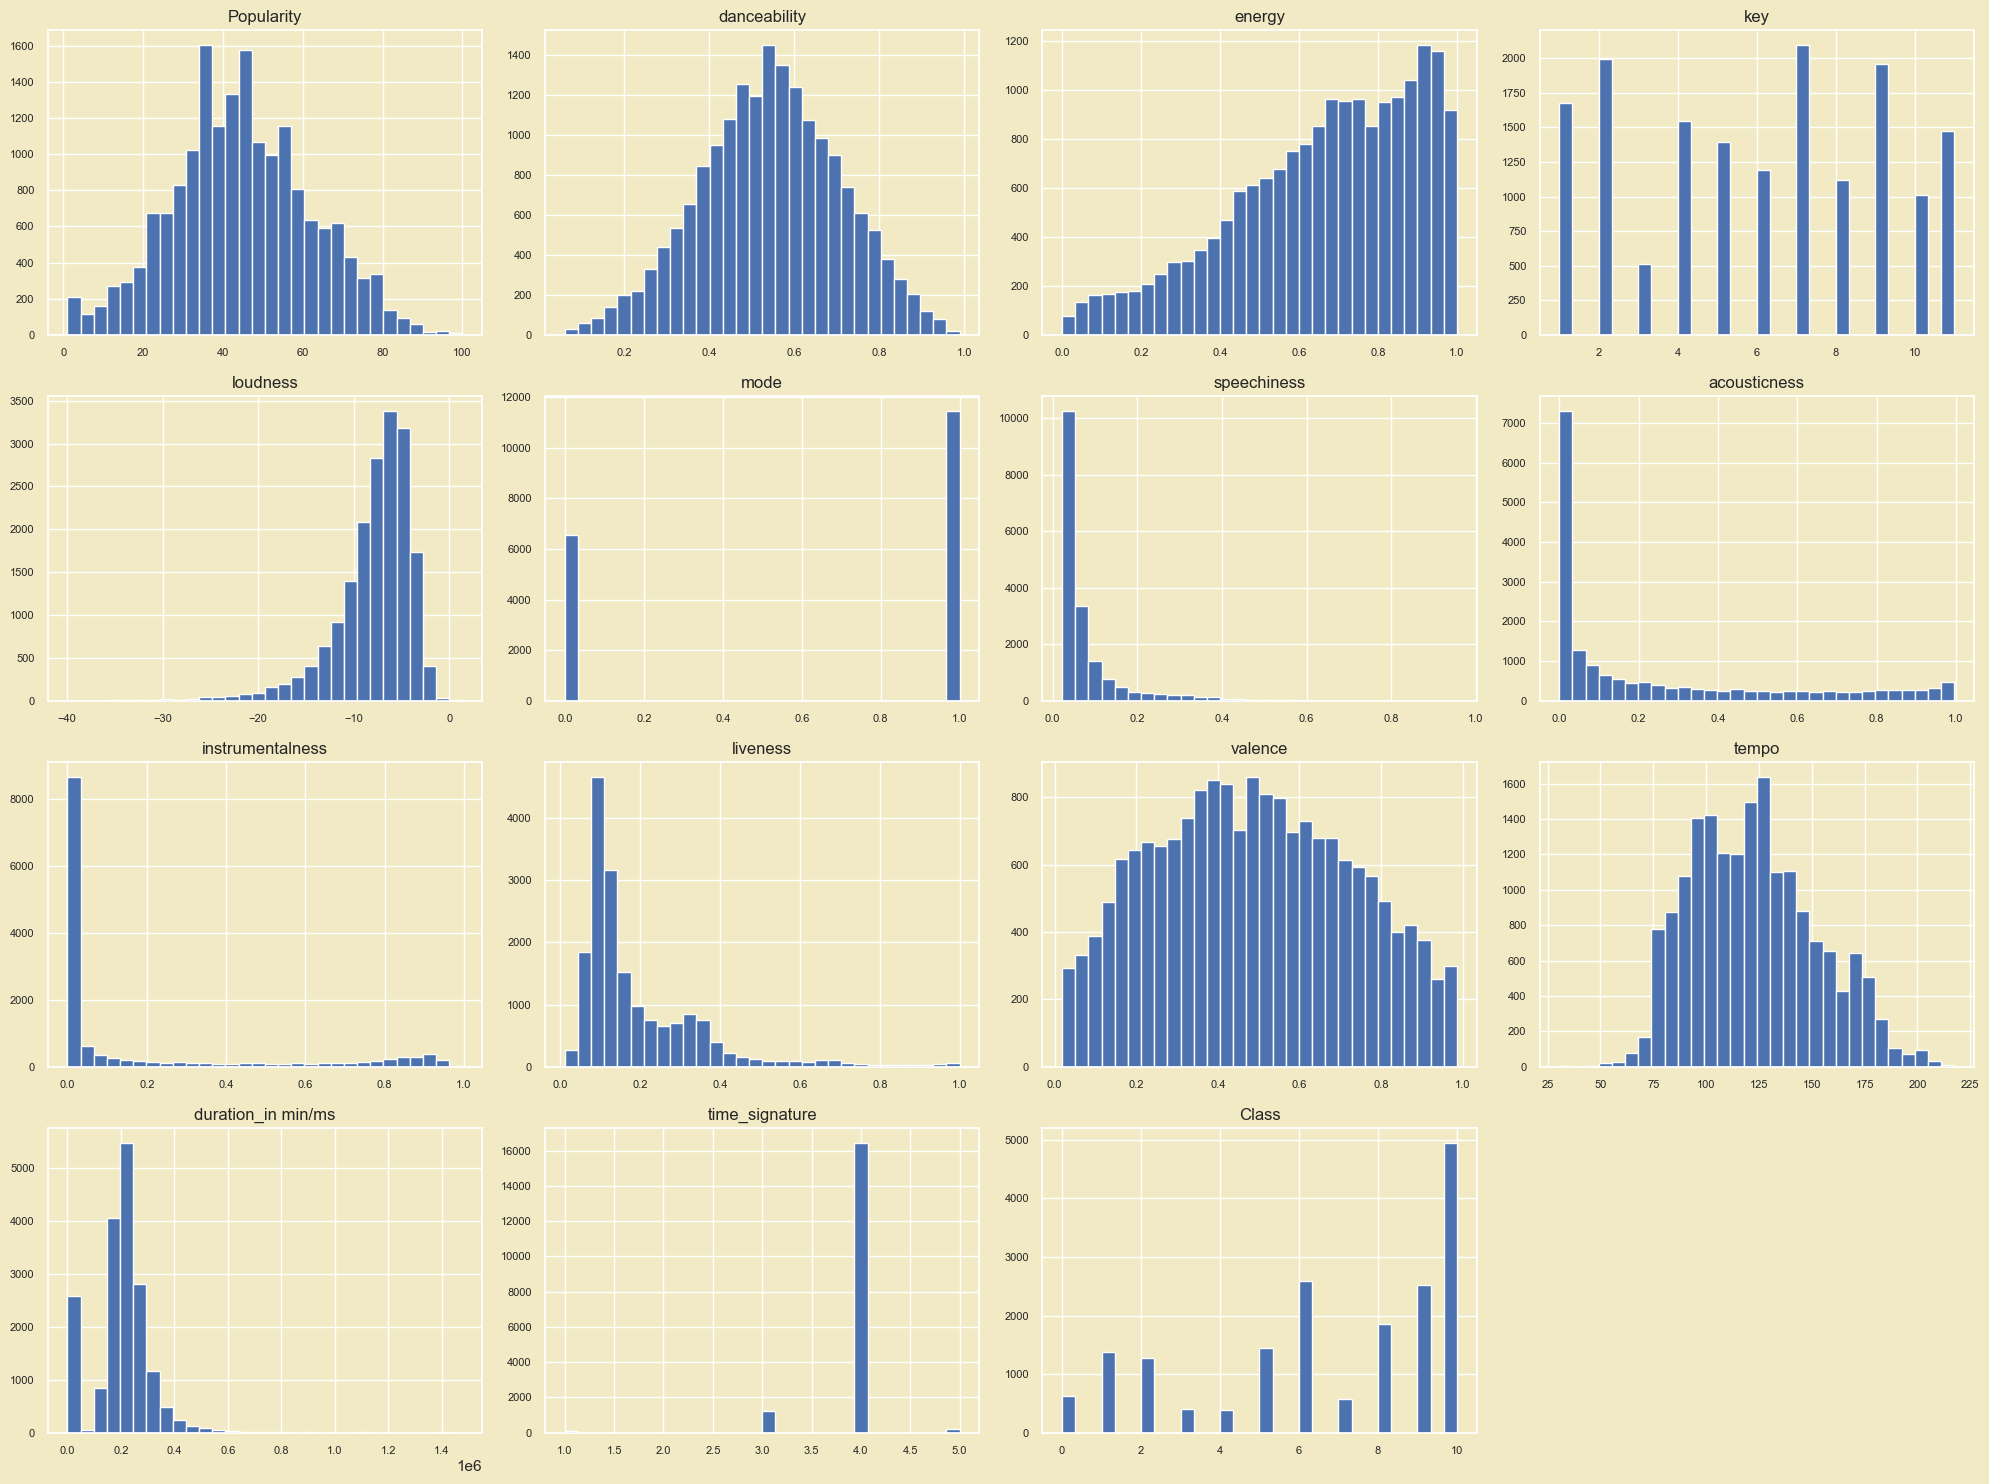

In [70]:
sb.set_style('darkgrid')
sb.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
numerical_cols.hist(figsize=(20,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

- The distribution for columns popularity, danceability, valence and tempo are close to normal.
- Columns speechiness, acousticness, instrumentalness, liveness and duration_in min/ms have right-skewed distributions
- Column loudness has a left-skewed distribution.
- The mode column has only 2 values; 0 and 1. 1 almost double the number of value 0.

C:\Users\irasy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Songs across Popularity Ratings')

<Figure size 2400x400 with 0 Axes>

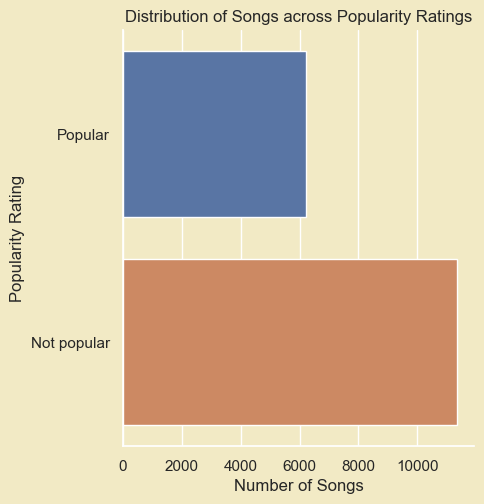

In [75]:
#to see songs are more inclined to which level of popularity
f = plt.figure(figsize=(24, 4))
sb.catplot(y = 'Popularity Rating', data = musicdata, kind="count")
plt.xlabel('Number of Songs')
plt.title('Distribution of Songs across Popularity Ratings')

The categorical plot reveals that the majority of songs fall into the <b>'Not Popular'</b> category, with over 10,000 songs, while the <b>'Popular'</b> category has slightly more than 6,000 songs.

Popularity Rating
Not popular    0.524705
Popular        0.577863
Name: danceability, dtype: float64


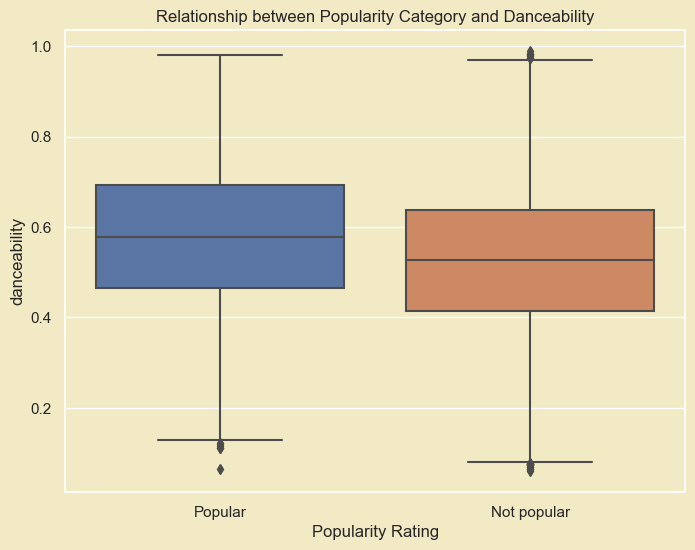

In [77]:
# Group by 'Category' and calculate mean of 'Numeric'
grouped_data = musicdata.groupby('Popularity Rating')['danceability'].mean()
 
# Display grouped data
print(grouped_data)
 
# Box Plot
plt.figure(figsize=(8, 6))
sb.boxplot(x='Popularity Rating', y='danceability', data=musicdata)
plt.xlabel('Popularity Rating')
plt.ylabel('danceability')
plt.title('Relationship between Popularity Category and Danceability')
plt.show()

Based on the box plot, it is evident that for songs categorized as 'Popular', the interquartile range of danceability spans from 0.5 to 0.7, indicating that 50% of the data falls within this range. This suggests a trend where songs with higher danceability ratings tend to be more popular than those with lower danceability ratings.

Popular: The highest occurrence of 0.9 energy 


Popularity Rating
Not popular    0.657254
Popular        0.676955
Name: energy, dtype: float64


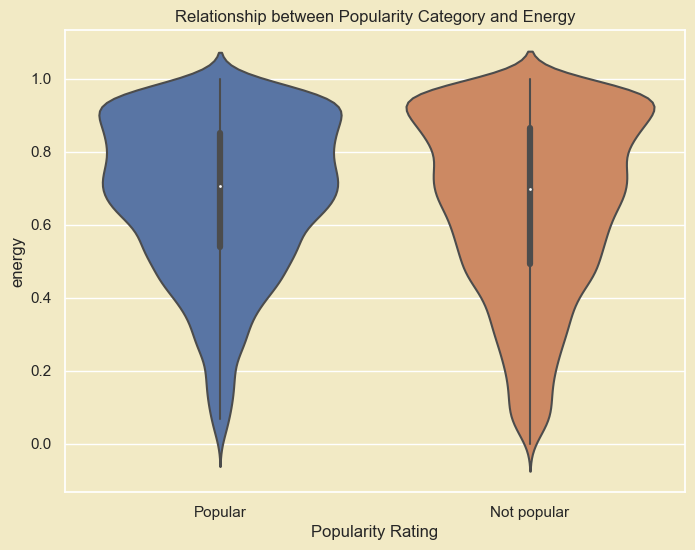

In [81]:
#sb.violinplot(x='Popularity Rating', y='energy', data=musicdata)
#plt.xlabel('Popularity Rating')
#plt.ylabel('energy')
#plt.title('Relationship between Popularity Category and Energy')
#plt.show()

# Group by 'Category' and calculate mean of 'energy'
grouped_data = musicdata.groupby('Popularity Rating')['energy'].mean()
 
# Display grouped data
print(grouped_data)
 
# Violin Plot
plt.figure(figsize=(8, 6))
sb.violinplot(x='Popularity Rating', y='energy', data=musicdata)
plt.xlabel('Popularity Rating')
plt.ylabel('energy')
plt.title('Relationship between Popularity Category and Energy')
plt.show()

From the violin plot, iit can be seen that Not Popular songs has a wider range of energy levels while the energy levels for most Popular songs are around 0.5 and higher.

In [16]:
# Categorical Predictors
musicdata[['Artist Name']].describe()

,Artist Name
count,17568
unique,8993
top,Backstreet Boys
freq,69


Among 17,966 songs, Backstreet Boys has 69 of its songs listed

In [17]:
top20 = musicdata[['Artist Name']].value_counts();
top20.head(20)

Artist Name       
Backstreet Boys       69
Omer Adam             48
Eyal Golan            48
Britney Spears        45
Shlomo Artzi          39
Itay Levi             35
Arik Einstein         35
Moshe Peretz          34
The Rolling Stones    34
Dudu Aharon           34
Hadag Nahash          33
Westlife              31
Yehudit Ravitz        31
U2                    30
Metallica             27
AC/DC                 27
Dudu Tassa            26
Lata Mangeshkar       26
Sarit Hadad           26
The Black Keys        24
Name: count, dtype: int64

#### Summary of Artists in the dataset
Out of the 17,996 songs in the dataset, there are 9,149 unique artist names present in the dataset. This shows that there is a diverse range of musical acts represented in the dataset.
<br>
`Backstreet Boys` is the most frequently occurring artist in the dataset with 69 songs, followed by `Westlife` with 60 songs and `Britney Spears` with 54 songs.
<p>The presence of internationally renowned artists like `Backstreet Boys`, `Britney Spears` and `The Beatles` among the top 20 indicates their popularity and influence within the dataset.</p>

#### Relationship between the Top 20 Artists and Popularity

In [18]:
top20 = musicdata['Artist Name'].value_counts()
top_20_artists = top20.head(20).index.tolist()  # Extracting the top 20 artist names
print(top_20_artists)  # Printing out the top 20 artist names

top_20_data = musicdata[musicdata['Artist Name'].isin(top_20_artists)]  # Filtering the original DataFrame
top_20_data.head()  # Printing out the DataFrame containing only rows with the top 20 artists

# You can then analyze the relationship between the top 20 artists and the popularity category
#popularity_artist_counts = top_20_data.groupby(['Popularity Rating', 'Artist Name']).size().unstack(fill_value=0)
#print(popularity_artist_counts.dtypes)
# Calculate the frequency of each popularity rating for each artist among the top 20
popularity_artist_counts = top_20_data.groupby(['Artist Name', 'Popularity Rating']).size().unstack(fill_value=0)

# Print out the resulting DataFrame
print(popularity_artist_counts)


['Backstreet Boys', 'Omer Adam', 'Eyal Golan', 'Britney Spears', 'Shlomo Artzi', 'Itay Levi', 'Arik Einstein', 'Dudu Aharon', 'The Rolling Stones', 'Moshe Peretz', 'Hadag Nahash', 'Yehudit Ravitz', 'Westlife', 'U2', 'AC/DC', 'Metallica', 'Dudu Tassa', 'Sarit Hadad', 'Lata Mangeshkar', 'Shalom Hanoch']
Popularity Rating   Not popular  Popular
Artist Name                             
AC/DC                         1       26
Arik Einstein                35        0
Backstreet Boys              55       14
Britney Spears               25       20
Dudu Aharon                  34        0
Dudu Tassa                   26        0
Eyal Golan                   47        1
Hadag Nahash                 33        0
Itay Levi                    35        0
Lata Mangeshkar              25        1
Metallica                     1       26
Moshe Peretz                 34        0
Omer Adam                    45        3
Sarit Hadad                  26        0
Shalom Hanoch                24        0


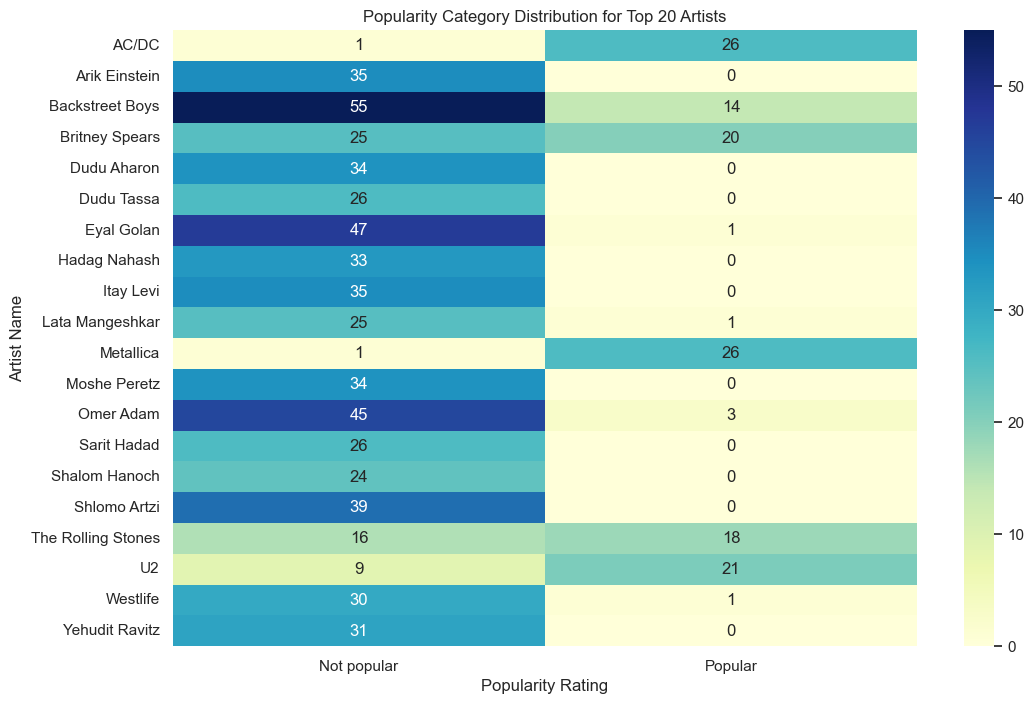

In [19]:
# Create a heatmap to see the distribution of popularity rating among the top 20 artists
plt.figure(figsize=(12, 8))
sb.heatmap(popularity_artist_counts, cmap="YlGnBu", annot=True, fmt="d")
plt.title('Popularity Category Distribution for Top 20 Artists')
plt.xlabel('Popularity Rating')
plt.ylabel('Artist Name')
plt.show()

#### Mapping of Class to Genre
We would like to map `Class` numerical genre values to their corresponding genre names using a predefined mapping dataset. This transformation serves to enhance the interpretability and clarity of our data by replacing numerical codes with descriptive genre labels. By doing so, we aim to make the dataset easier to understand and interpretate the genre distribution within the dataset.

In [20]:
mapping_class = {0: 'Acoustic/Folk', 1: 'Alternative', 2: 'Blues', 3: 'Bollywood', 4: 'Country',5: 'HipHop', 6: 'Indie Alternative', 7: 'Instrumental', 8: 'Metal', 9: 'Pop', 10: 'Rock'}
musicdata_class = pd.DataFrame(musicdata['Class'].map(mapping_class))
musicdata_class.describe()

,Class
count,17568
unique,11
top,Rock
freq,4862


We can see that there are 11 unique genres and `Rock` is the predominant genre in the dataset, appearing most frequently among the songs.

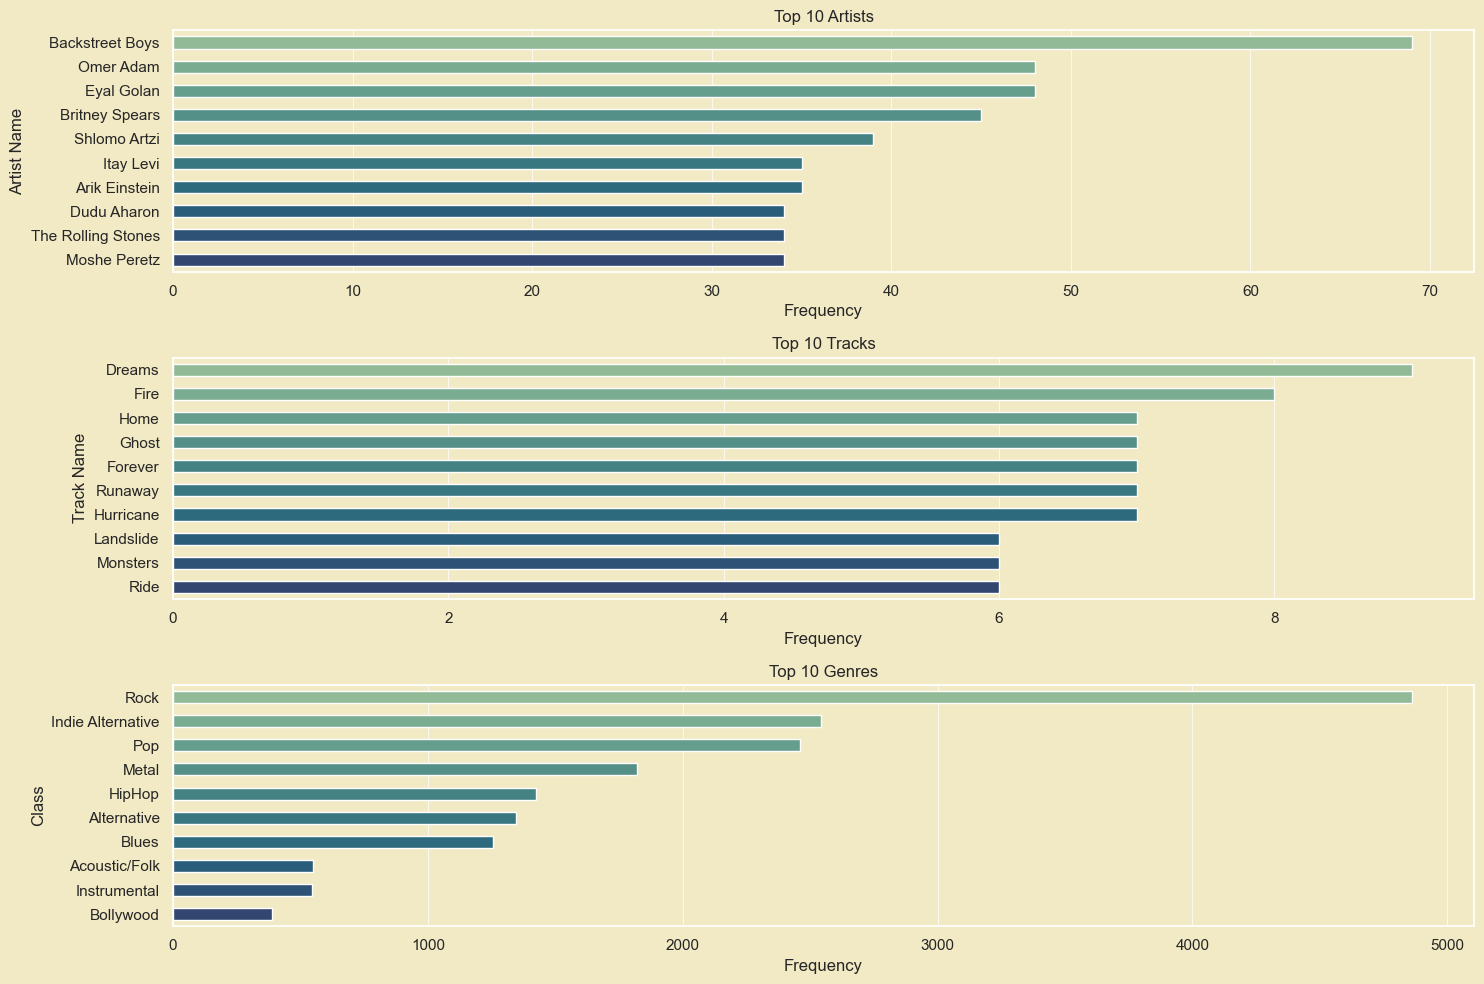

In [21]:
top_n = 10
sb.set_style('darkgrid')
sb.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
# Get the top N most frequent artists, albums, tracks, and genres
top_artists = musicdata['Artist Name'].value_counts().head(top_n)
top_tracks = musicdata['Track Name'].value_counts().head(top_n)
top_genres = musicdata_class['Class'].value_counts().head(top_n)

# Disable FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    
    # Plotting
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

    # Top N Artists
    sb.barplot(x=top_artists.values, y=top_artists.index, palette="crest", ax=axes[0], orient='h',  zorder=3, width=0.5)
    axes[0].set_title(f'Top {top_n} Artists')
    axes[0].set_xlabel('Frequency')
    axes[0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Tracks
    sb.barplot(x=top_tracks.values, y=top_tracks.index, palette="crest", ax=axes[1], orient='h', zorder=3, width=0.5)
    axes[1].set_title(f'Top {top_n} Tracks')
    axes[1].set_xlabel('Frequency')
    axes[1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Genres
    sb.barplot(x=top_genres.values, y=top_genres.index, palette="crest", ax=axes[2], orient='h', zorder=3, width=0.5)
    axes[2].set_title(f'Top {top_n} Genres')
    axes[2].set_xlabel('Frequency')
    axes[2].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()


Popularity Rating  Not popular  Popular
Genre                                  
Acoustic/Folk              416      135
Alternative                844      500
Blues                     1159       98
Bollywood                  346       42
Country                    106      261
HipHop                     726      699
Indie Alternative         1776      768
Instrumental               457       90
Metal                     1382      440
Pop                       1321     1140
Rock                      2829     2033


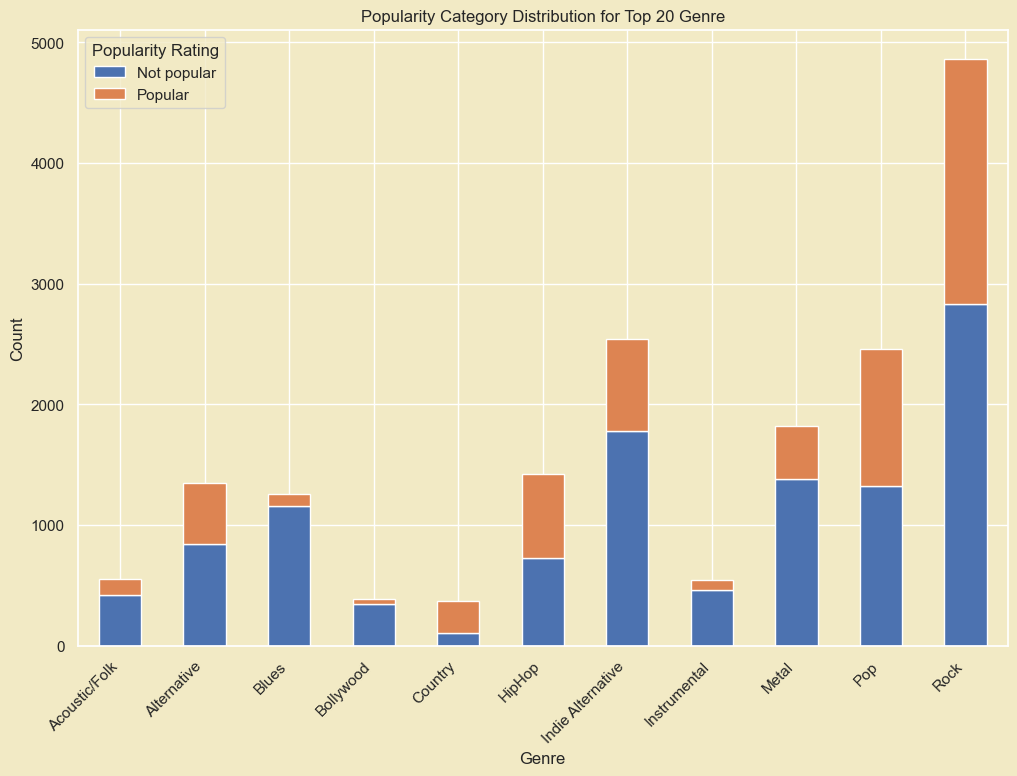

In [22]:
musicdata['Genre'] = musicdata_class

# Calculate the frequency of each popularity rating for each genre among the top 20
popularity_genre_counts = musicdata.groupby(['Genre', 'Popularity Rating']).size().unstack(fill_value=0)

# Print out the resulting DataFrame
print(popularity_genre_counts)


# Create a stacked bar plot
popularity_genre_counts.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Popularity Category Distribution for Top 20 Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Popularity Rating')
plt.show()

We then analysed the relationship between the top 20 artists and the popularity category.
Pop has the highest number of songs with rating Very popular

In [23]:
numeric_musicdata = pd.DataFrame(musicdata[['danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence']])
numeric_musicdata.describe()

,danceability,energy,speechiness,instrumentalness,liveness,valence
count,17568.000000,17568.000000,17568.000000,13306.000000,17568.000000,17568.000000
mean,0.543483,0.664213,0.079779,0.177543,0.196442,0.486749
std,0.166519,0.234331,0.083628,0.303677,0.159792,0.239917
min,0.059900,0.000020,0.022500,0.000001,0.011900,0.018300
25%,0.431000,0.512000,0.034875,0.000090,0.097300,0.298000
50%,0.545500,0.701000,0.047500,0.003950,0.129000,0.482000
75%,0.660000,0.861000,0.083000,0.202000,0.258000,0.673000
max,0.989000,1.000000,0.955000,0.996000,1.000000,0.986000


<Axes: title={'center': 'Correlation Heatmap'}>

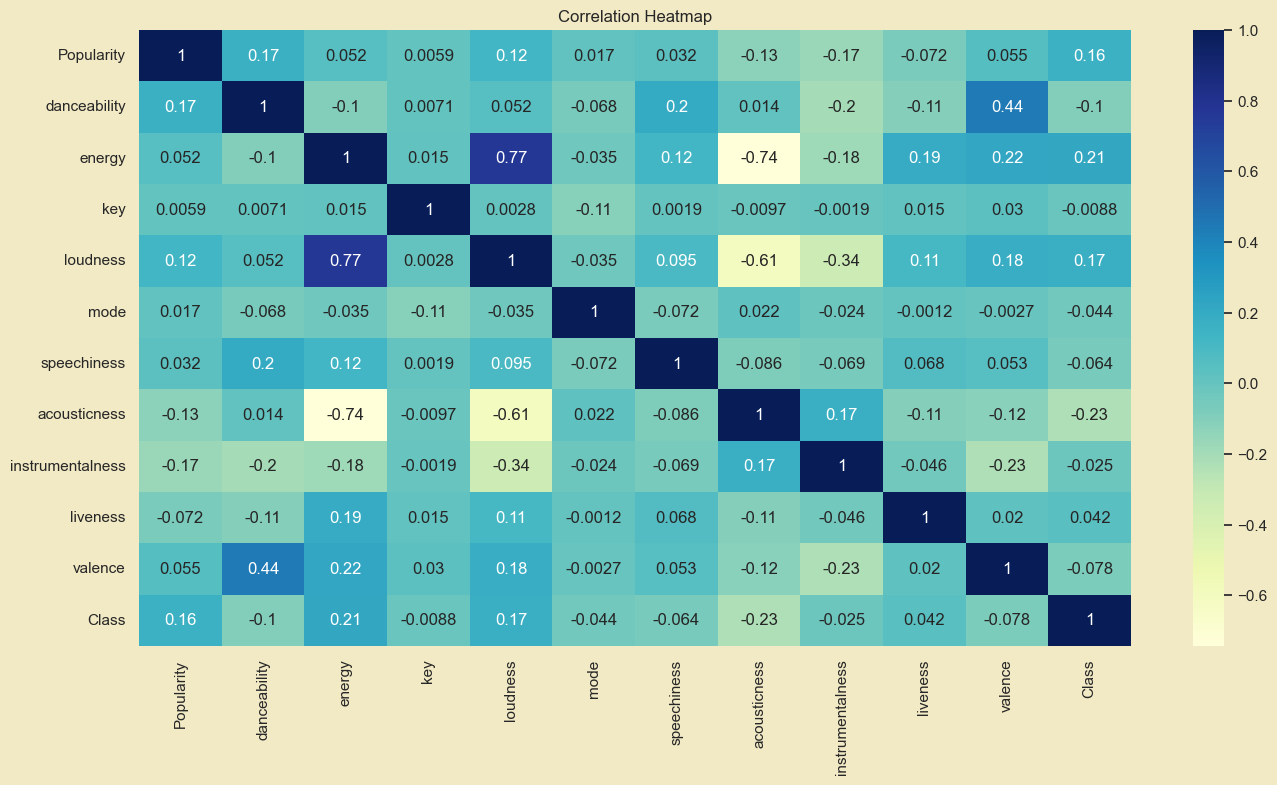

In [24]:
test = pd.DataFrame(musicdata[['Popularity','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'Class']])
plt.figure(figsize=(16, 8))
sb.set(style="whitegrid")
corr = test.corr()
plt.title('Correlation Heatmap')
sb.heatmap(corr,annot=True, cmap="YlGnBu")

### Data Cleaning and Preprocessing
Find out if there are any null values in the dataset.

In [25]:
musicdata.isnull().sum()

Artist Name              0
Track Name               0
Popularity               0
danceability             0
energy                   0
key                   1955
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4262
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
Popularity Rating        0
Genre                    0
dtype: int64

#### Key and instrumentalness have null values, and we will replace the null values with  its respective mean value.

In [26]:
mean_key = musicdata["key"].mean()
mean_key

5.957407288797797

In [27]:
musicdata["key"].fillna(mean_key,inplace=True)

In [28]:
mean_instrumental = musicdata["instrumentalness"].mean()
mean_instrumental

0.17754311683902002

In [29]:
musicdata["instrumentalness"].fillna(mean_instrumental,inplace=True)

In [30]:
musicdata.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
Popularity Rating     0
Genre                 0
dtype: int64

#### Identifying Outliers and removing them

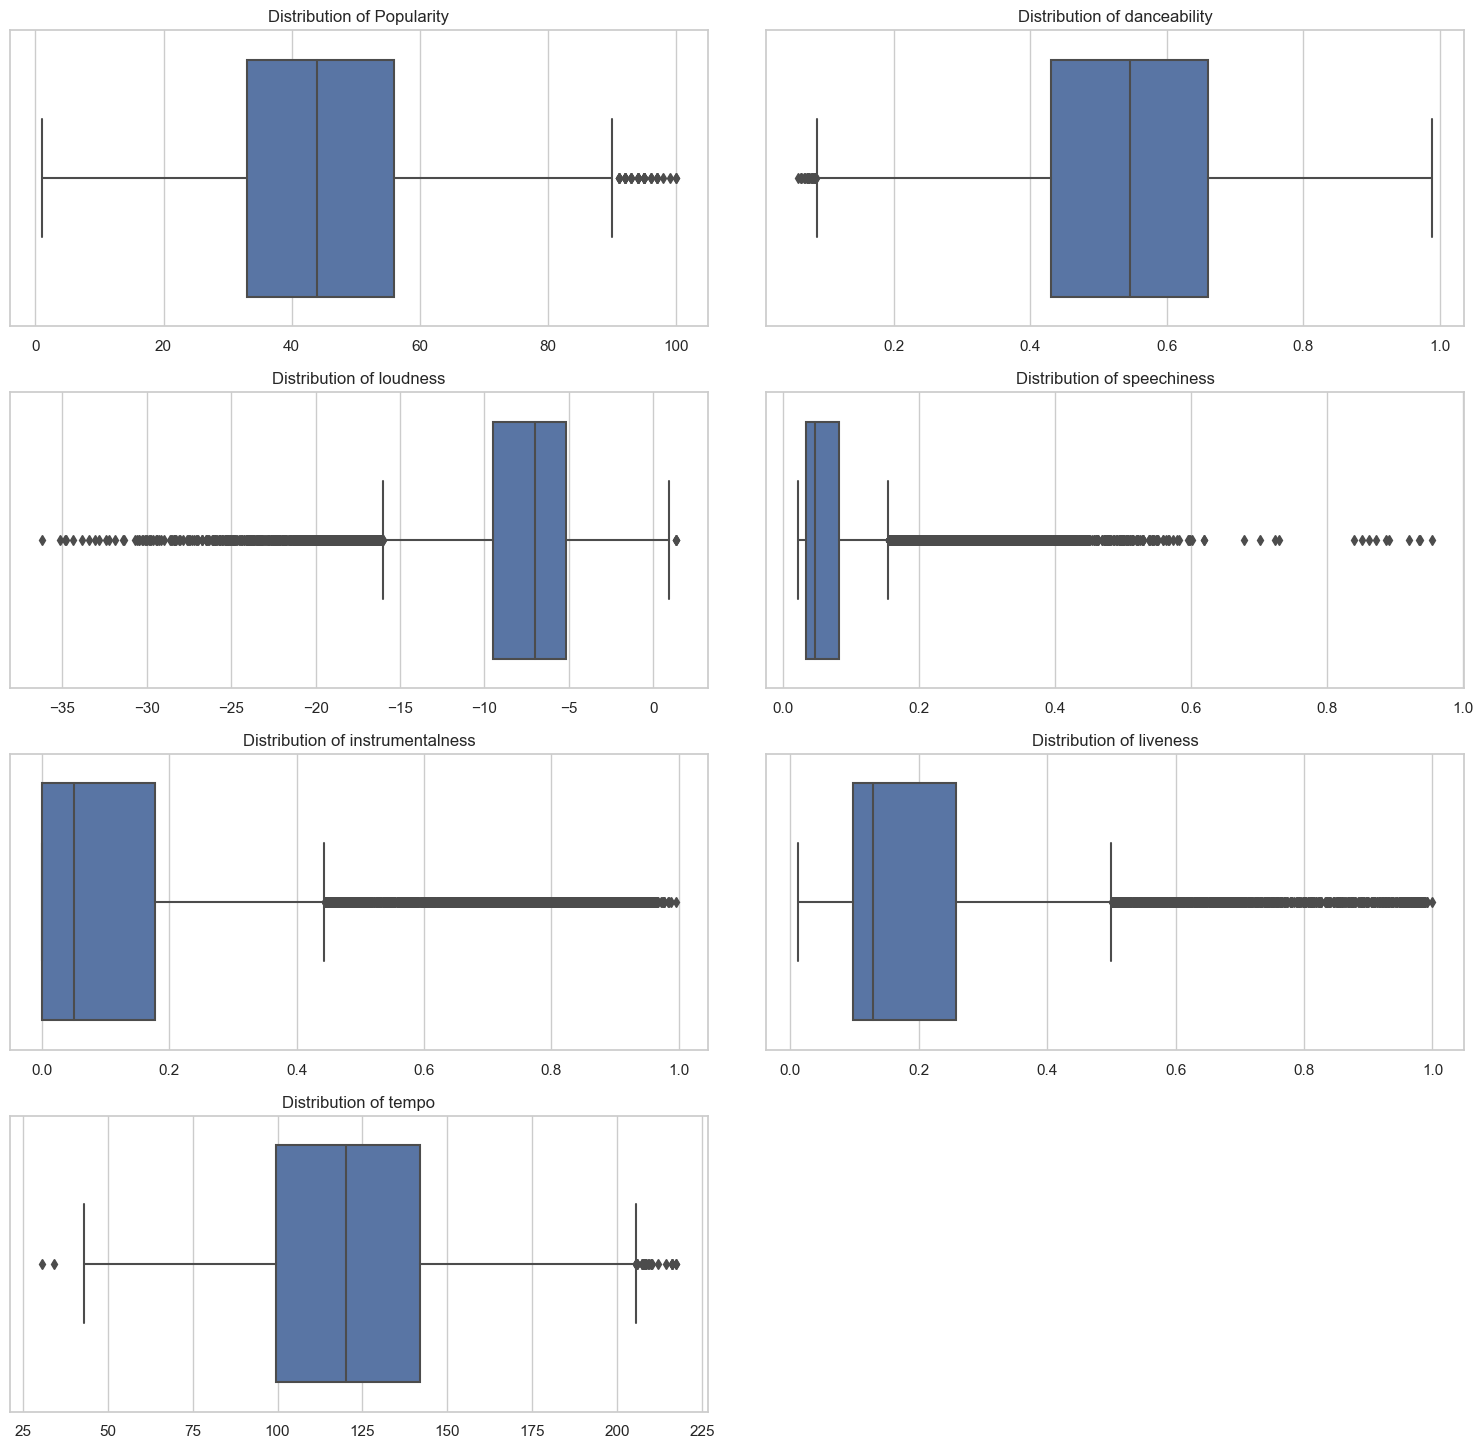

In [33]:
df=pd.DataFrame(musicdata[['Popularity', 'danceability', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'tempo']])

fig = plt.figure(figsize=(15, 18)) # sets the size of the 4 plot with width as 10 and height as 10
for i, columns in enumerate(df.columns, 1): 
    ax = plt.subplot(5, 2, i) # creates 3 subplots in one single row
    sb.boxplot(data=df, x=df[columns]) # creates box plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot

plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() #displays the plots

In [37]:
# to find out the number of outliers in numeric variables
df=pd.DataFrame(musicdata[['Popularity', 'danceability', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'tempo']])
for var in df:
    data=df[var]
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    med = np.median(data)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outlier = len(data[(data>upper_bound) | (data<lower_bound)])
    print( f' {var: >15} number of outliers: {outlier: >5} ')

      Popularity number of outliers:    41 
    danceability number of outliers:    22 
        loudness number of outliers:   783 
     speechiness number of outliers:  1992 
 instrumentalness number of outliers:  2528 
        liveness number of outliers:   936 
           tempo number of outliers:    38 


In [ ]:
#### NOT USING THIS
#for var in df:
#    data=df[var]
 #   q1 = np.quantile(data, 0.25)
  #  q3 = np.quantile(data, 0.75)
 #   med = np.median(data)
  #  iqr = q3-q1
  #  upper_bound = q3+(1.5*iqr)
   # lower_bound = q1-(1.5*iqr)
   # outlier = data[(data>upper_bound) | (data<lower_bound)]
    # Remove outliers from the DataFrame
   # cleaned_df = df.drop(outlier.index)

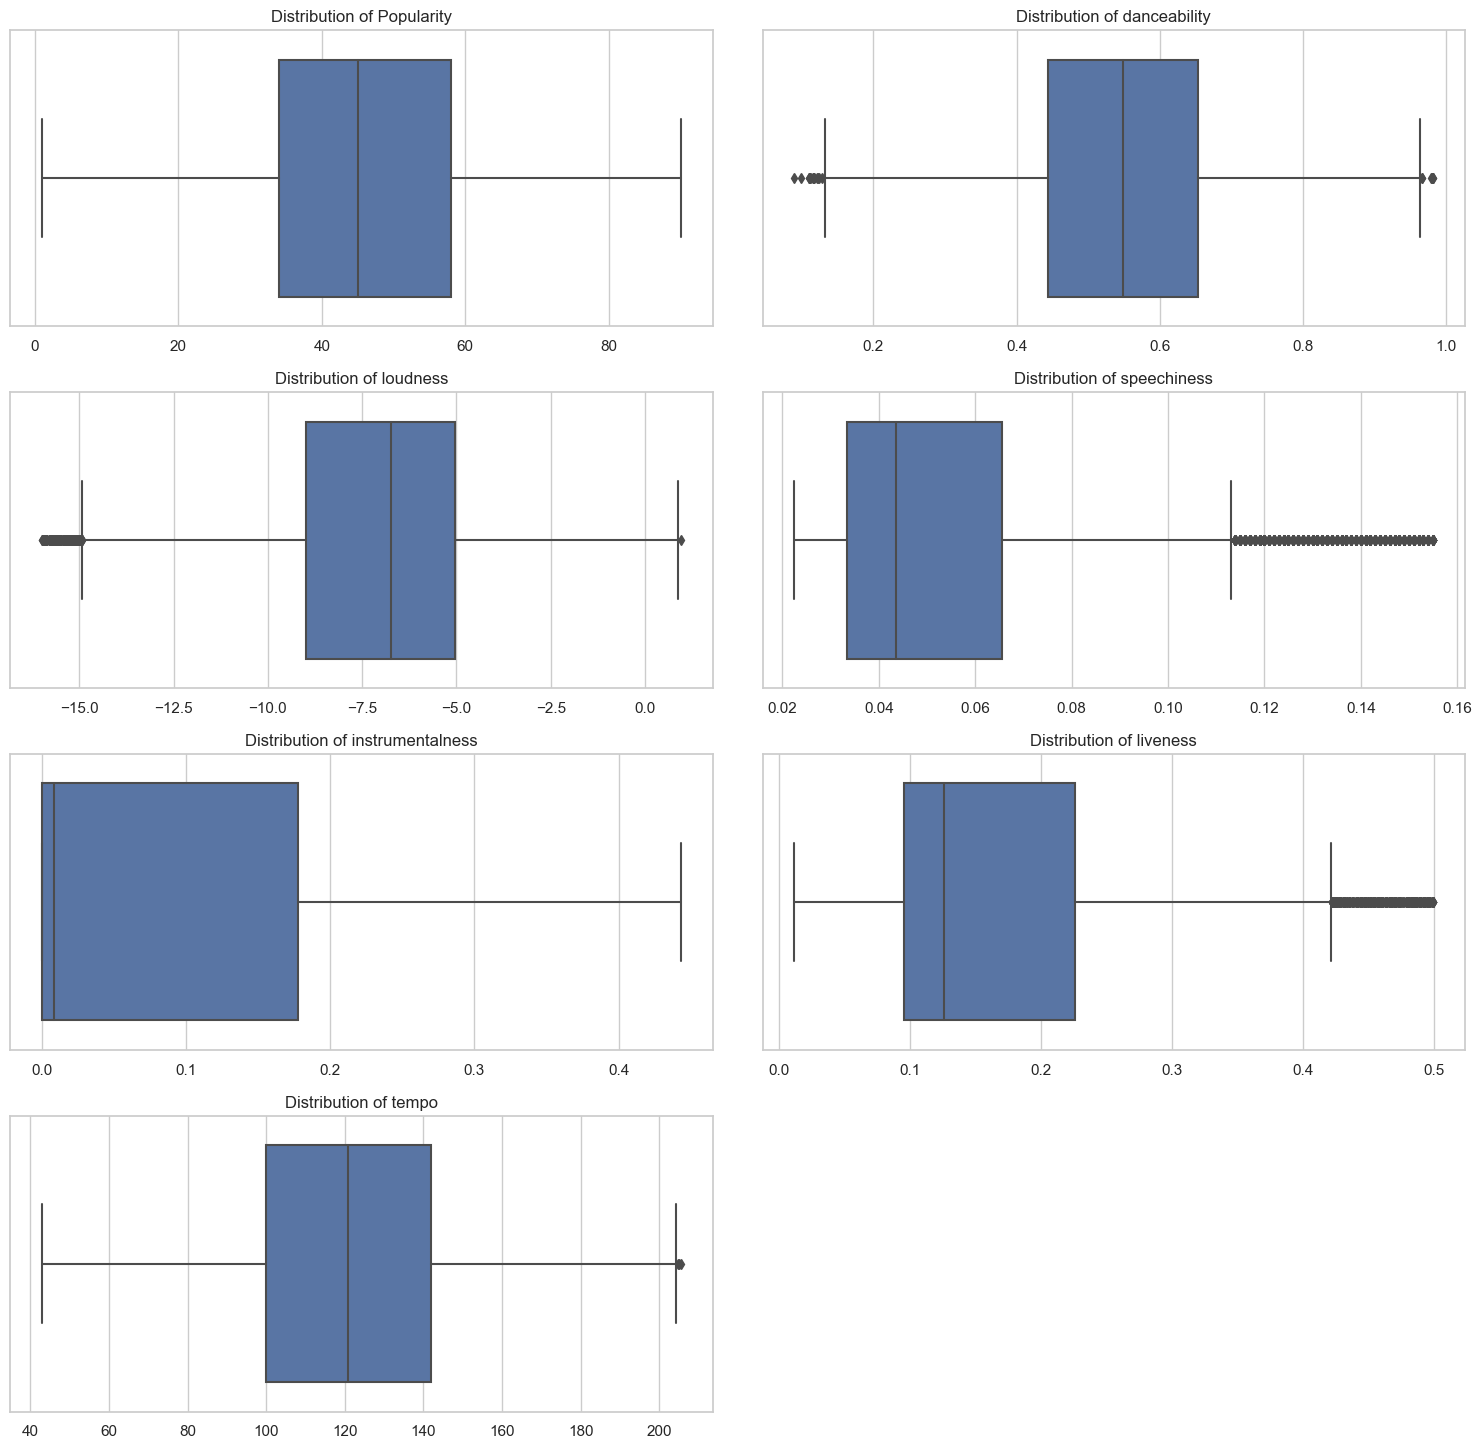

      Popularity number of outliers:     0 
    danceability number of outliers:    23 
        loudness number of outliers:   147 
     speechiness number of outliers:   808 
 instrumentalness number of outliers:     0 
        liveness number of outliers:   284 
           tempo number of outliers:     3 


In [45]:
# Find out the number of outliers in numeric variables and remove them
df = pd.DataFrame(musicdata[['Popularity', 'danceability', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'tempo']])
cleaned_df = df.copy()  # Make a copy of the original DataFrame

for var in df:
    data = df[var]
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    outliers = data[(data > upper_bound) | (data < lower_bound)]
    
    # Remove outliers from the DataFrame
    cleaned_df = cleaned_df[~((cleaned_df[var] > upper_bound) | (cleaned_df[var] < lower_bound))]

# Display boxplots for the cleaned data
fig = plt.figure(figsize=(15, 18))
for i, column in enumerate(cleaned_df.columns, 1): 
    ax = plt.subplot(5, 2, i)
    sb.boxplot(data=cleaned_df, x=column)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {column}')

plt.tight_layout(w_pad=3)
plt.show()

for var in cleaned_df:
    data=cleaned_df[var]
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    med = np.median(data)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outlier = len(data[(data>upper_bound) | (data<lower_bound)])
    print( f' {var: >15} number of outliers: {outlier: >5} ')

In [46]:
categorical_cols = musicdata[musicdata.columns[(musicdata.dtypes == 'object') | (musicdata.dtypes == 'bool')]]
categorical_cols.shape

(17568, 4)

In [47]:
categorical_cols.sample(5)

,Artist Name,Track Name,Popularity Rating,Genre
6816,Christine Ott,Time to Die,Not popular,Indie Alternative
13662,Marshmello,Here With Me,Popular,Pop
13608,Venom,Black Metal,Not popular,Metal
3419,The Hollies,Long Cool Woman (In a Black Dress) - 1999 Rema...,Popular,Rock
432,Swamp Dogg,Please Let Me Go Round Again,Not popular,Indie Alternative


In [48]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17568 entries, 0 to 17995
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Artist Name        17568 non-null  object
 1   Track Name         17568 non-null  object
 2   Popularity Rating  17568 non-null  object
 3   Genre              17568 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


We can confirm that the 4 categorical colummns do not have an missing or null values.

In [95]:
musicdata.dropna(inplace=True)

In [97]:
musicdata.sample(5)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Popularity Rating
12526,Hayes McMullan,Goin' Away Mama Blues,23.0,0.945963,-1.959736,3.0,-1.388501,1,0.0582,2.307645,-0.572845,-0.781301,1.468263,101.734,145853.0,4,2,Not popular
13563,Devil Sold His Soul,Signal Fire,41.0,-2.381070,0.955029,5.0,0.444585,0,0.0926,-0.792042,-0.489496,1.061144,-1.182727,161.293,413829.0,3,8,Not popular
3414,Alabama Shakes,Hold On,59.0,0.189274,0.007624,5.0,0.614108,1,0.0301,-0.126338,0.538280,-0.696189,0.246973,88.311,226187.0,4,9,Popular
4655,Llyr,Winged Chamber Music,12.0,-1.095898,-0.756275,5.0,-3.398340,0,0.2390,0.183970,2.253984,1.042369,-1.700421,126.346,371382.0,4,6,Not popular
5854,Fossa Beats,Gonna Be,40.0,1.000013,-0.867232,7.0,-0.584516,0,0.0570,1.451064,1.766605,-0.584791,-1.532858,123.016,191220.0,4,1,Not popular


In [86]:
from sklearn.preprocessing import OneHotEncoder
# Encode categorical variables (artist name and track name)
label_encoder = LabelEncoder()
data_encoded = musicdata.copy()
data_encoded['Artist Name'] = label_encoder.fit_transform(musicdata['Artist Name'].str.lower())
data_encoded['Track Name'] = label_encoder.fit_transform(musicdata['Track Name'].str.lower())

#### Creating Modals

In [90]:
musicdata_test = pd.read_csv('test.csv')
musicdata_test['Popularity Rating'] = musicdata_test.apply(lambda row: popularity(row), axis=1)
musicdata_test = musicdata_test.drop(musicdata_test[musicdata_test['Popularity Rating'] == 'Unknown'].index)

In [98]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree


ohe = OneHotEncoder()
predictor_arrays = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

musicdata_popularity_rating = pd.DataFrame(musicdata['Popularity Rating'].astype('category'))
musicdata_predictor = pd.DataFrame(musicdata[predictor_arrays])

ohe.fit(musicdata_popularity_rating)
musicdata_popularity_rating_ohe = pd.DataFrame(ohe.transform(musicdata_popularity_rating).toarray(), columns=ohe.get_feature_names_out(musicdata_popularity_rating.columns))

dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(musicdata_predictor, musicdata_popularity_rating_ohe)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(musicdata_predictor, musicdata_popularity_rating_ohe))
print()

#Print the Classification Accuracy for Test Dataset
musicdata_test_popularity_rating = pd.DataFrame(musicdata_test['Popularity Rating'].astype('category'))
musicdata_test_predictor = pd.DataFrame(musicdata_test[predictor_arrays])

ohe.fit(musicdata_test_popularity_rating)
musicdata_test_popularity_rating_ohe = pd.DataFrame(ohe.transform(musicdata_test_popularity_rating).toarray(), columns=ohe.get_feature_names_out(musicdata_test_popularity_rating.columns))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(musicdata_test_predictor, musicdata_test_popularity_rating_ohe))
print()



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.688902057055786

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.635319262623564



[Text(0.5, 0.9, 'instrumentalness <= 0.471\ngini = 0.432\nsamples = 11813\nvalue = [[3732, 8081]\n[8081, 3732]]'),
 Text(0.25, 0.7, 'danceability <= -0.024\ngini = 0.459\nsamples = 9254\nvalue = [[3299, 5955]\n[5955, 3299]]'),
 Text(0.125, 0.5, 'instrumentalness <= -0.577\ngini = 0.428\nsamples = 4616\nvalue = [[1430, 3186]\n[3186, 1430]]'),
 Text(0.0625, 0.3, 'acousticness <= 1.365\ngini = 0.457\nsamples = 2585\nvalue = [[913, 1672]\n[1672, 913]]'),
 Text(0.03125, 0.1, 'gini = 0.468\nsamples = 2239\nvalue = [[837, 1402]\n[1402, 837]]'),
 Text(0.09375, 0.1, 'gini = 0.343\nsamples = 346\nvalue = [[76, 270]\n[270, 76]]'),
 Text(0.1875, 0.3, 'liveness <= -0.682\ngini = 0.38\nsamples = 2031\nvalue = [[517, 1514]\n[1514, 517]]'),
 Text(0.15625, 0.1, 'gini = 0.472\nsamples = 277\nvalue = [[106, 171]\n[171, 106]]'),
 Text(0.21875, 0.1, 'gini = 0.359\nsamples = 1754\nvalue = [[411, 1343]\n[1343, 411]]'),
 Text(0.375, 0.5, 'acousticness <= 0.816\ngini = 0.481\nsamples = 4638\nvalue = [[1869, 27

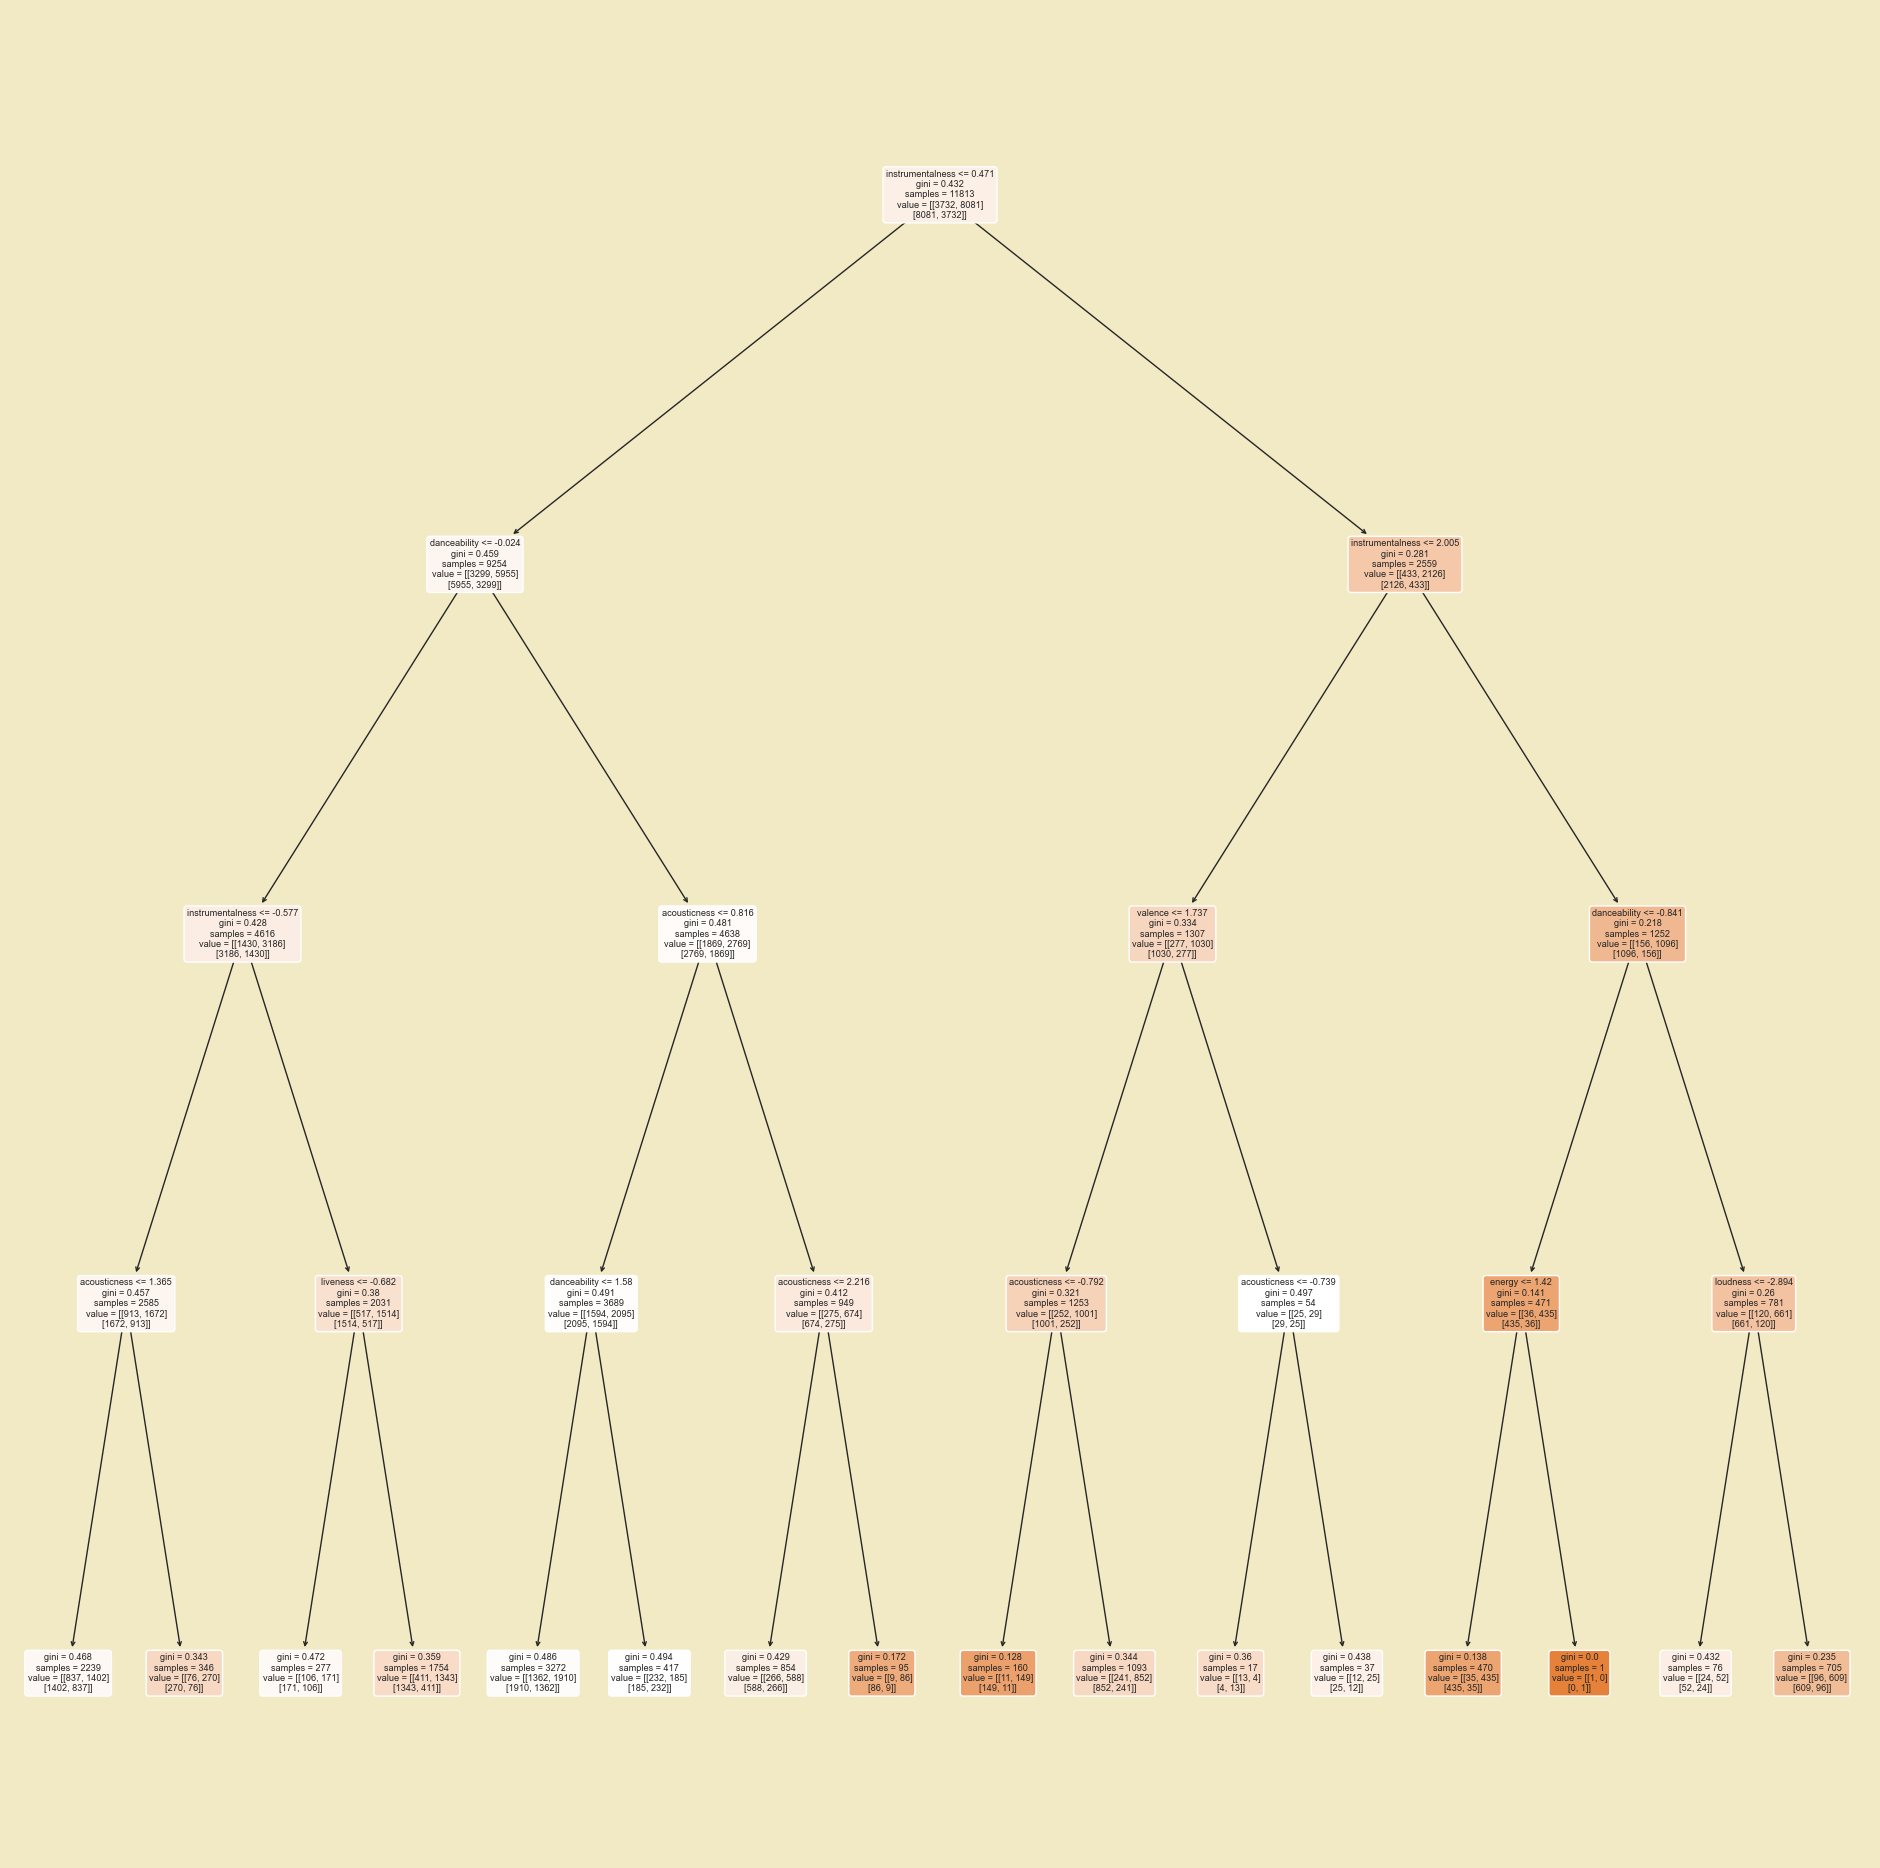

In [99]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=list(musicdata_predictor.columns), 
          class_names=list(ohe.get_feature_names_out(musicdata_popularity_rating.columns)))

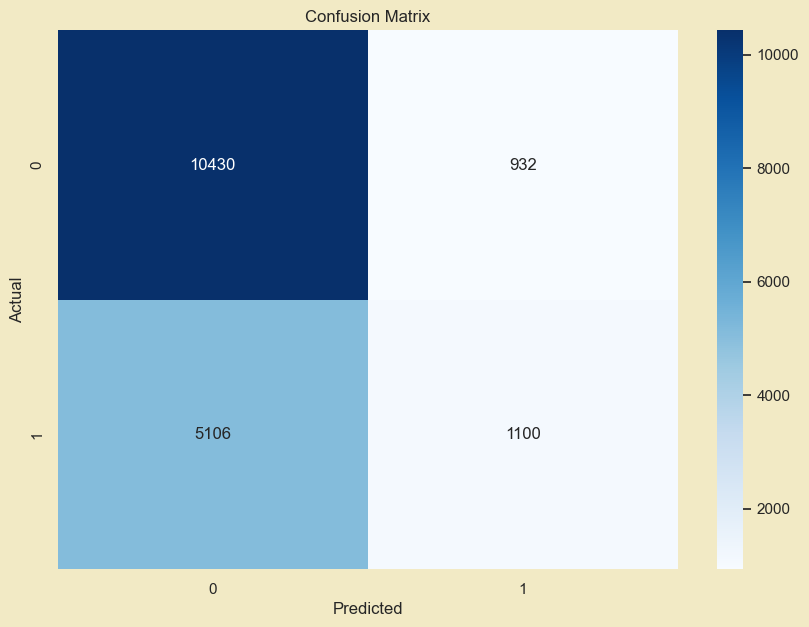

In [93]:
from sklearn.metrics import confusion_matrix

# Extract target variable and convert it to categorical type
musicdata['Popularity Rating'] = musicdata['Popularity Rating'].astype('category')

# Create and fit the Decision Tree classifier
dectree = DecisionTreeClassifier(max_depth=4)  # You can change max_depth to experiment
dectree.fit(musicdata_predictor, musicdata['Popularity Rating'])

# Predict
predicted = dectree.predict(musicdata_predictor)

# Create confusion matrix
cm = confusion_matrix(musicdata['Popularity Rating'], predicted)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [100]:
# Extract target variable and convert it to categorical type
musicdata_test['Popularity Rating'] = musicdata_test['Popularity Rating'].astype('category')

# Predict
predicted_test = dectree.predict(musicdata_test_predictor)

# Create confusion matrix
cm_test = confusion_matrix(musicdata_test['Popularity Rating'], predicted_test)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sb.heatmap(cm_test, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [ ]:
# Interactive Prediction Widget
from collections import Counter
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

In [ ]:
# Create dropdown for track selection using actual track names
track_dropdown = widgets.Dropdown(
    options=musicdata['Track Name'].unique(),
    value=musicdata['Track Name'].unique()[0],
    description='Select Track:'
)

In [ ]:
# Button to predict the genre
predict_button = widgets.Button(description='Predict Popularity')

# Output area for displaying the predicted popularity
output_area = widgets.Output()

In [ ]:
# Function to perform majority voting
def majority_vote(predictions):
    vote_counter = Counter(predictions)
    majority_class = vote_counter.most_common(1)[0][0]
    return majority_class

In [ ]:
# Function to handle button click event
def on_button_click(b):
    with output_area:
        clear_output(wait=True)
        # Fetch values from the selected track details
        selected_track_name = track_dropdown.value
        selected_track_data = musicdata[musicdata['Track Name'] == selected_track_name].iloc[0]
        # Prepare the input data for prediction
        input_data = [selected_track_data.drop('Popularity Rating').values]

        # List to store predictions from all classifiers
        all_predictions = []

         # Make prediction
        predicted_popularity = dectree.predict([input_data])[0]

        # Display the predicted popularity
        display(HTML(f'<p>Predicted Popularity Rating for "{selected_track_name}": {predicted_popularity}</p>'))

        # Attach the button click event
        predict_button.on_click(on_button_click)

        # Display widgets
        display(widgets.VBox([track_dropdown, predict_button, output_area]))

# Attach the button click event
predict_button.on_click(on_button_click)

In [ ]:
# Apply styling to the dropdown
track_dropdown.add_class('custom-dropdown-style')

# Create a custom CSS style for the dropdown
custom_dropdown_style = """
    .custom-dropdown-style {
        width: 475px;
        font-weight: bold;
        background-color: #ccb1ce;
        border-radius: 15px;
        padding-left: 15px;
        padding-right: 20px;
    }
"""
display(HTML(f'<style>{custom_dropdown_style}</style>'))

predict_button.style.button_color = '#ccb1ce'
predict_button.style.font_weight = 'bold'
predict_button.layout.width = '475px'

In [ ]:
# Display widgets
display(track_dropdown, predict_button, output_area)